In [39]:
# IMPORTING LIBRARIES 

# Data Manipulation and Exploration Libraries
import numpy as np
import pandas as pd

# Data Visualisation Library
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # for data preprocessing

from sklearn.model_selection import train_test_split #for model selection and splitting the data

#for machine learning algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.svm import SVC  # For classification
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR  # For regression

from sklearn.metrics import d2_absolute_error_score,mean_squared_error, r2_score, mean_absolute_error #for model evaluation

from sklearn.preprocessing import PolynomialFeatures #for creating a polynomial
from sklearn.pipeline import make_pipeline #for making a pipeline to ensure smooth functioning of the programme

#to supress warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
#loading the dataset 
df= pd.read_csv("updated_dataset.csv")
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Prev Close,Prev High,Prev Low,Rolling_Mean_7,Rolling_Std_7,Daily Return,Volatility,7-day MA,30-day MA
0,2023-08-16,-1.399843,-1.370311,-1.380968,-1.336592,-0.750780,-0.736946,-1.345358,-1.370190,-1.407374,-1.280277,-0.963216,NaN,NaN,NaN,NaN
1,2023-08-17,-1.349773,-1.383207,-1.375340,-1.397799,-0.361228,-0.282106,-1.326641,-1.359896,-1.370442,-1.300888,-0.832587,-0.730900,NaN,NaN,NaN
2,2023-08-18,-1.441133,-1.436586,-1.420518,-1.431608,-0.477262,-0.360396,-1.387956,-1.372809,-1.364805,-1.324045,-0.677735,-0.456725,NaN,NaN,NaN
3,2023-08-21,-1.429529,-1.404863,-1.393965,-1.380403,-0.417519,-0.804517,-1.421824,-1.426257,-1.410052,-1.345270,-1.047809,0.405379,NaN,NaN,NaN
4,2023-08-22,-1.370310,-1.394187,-1.341106,-1.378654,-0.916872,-0.850922,-1.370529,-1.394493,-1.383458,-1.358296,-1.309400,-0.096785,NaN,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             243 non-null    object 
 1   Open             243 non-null    float64
 2   High             243 non-null    float64
 3   Low              243 non-null    float64
 4   Close            243 non-null    float64
 5   Shares Traded    243 non-null    float64
 6   Turnover (₹ Cr)  243 non-null    float64
 7   Prev Close       243 non-null    float64
 8   Prev High        243 non-null    float64
 9   Prev Low         243 non-null    float64
 10  Rolling_Mean_7   243 non-null    float64
 11  Rolling_Std_7    243 non-null    float64
 12  Daily Return     242 non-null    float64
 13  Volatility       213 non-null    float64
 14  7-day MA         237 non-null    float64
 15  30-day MA        214 non-null    float64
dtypes: float64(15), object(1)
memory usage: 30.5+ KB


In [42]:
#converting data type of date from object -> timeseries 
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [43]:
df.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Shares Traded       0
Turnover (₹ Cr)     0
Prev Close          0
Prev High           0
Prev Low            0
Rolling_Mean_7      0
Rolling_Std_7       0
Daily Return        1
Volatility         30
7-day MA            6
30-day MA          29
dtype: int64

In [44]:
df.fillna(0, inplace=True)
df.isnull().sum()


Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
Prev Close         0
Prev High          0
Prev Low           0
Rolling_Mean_7     0
Rolling_Std_7      0
Daily Return       0
Volatility         0
7-day MA           0
30-day MA          0
dtype: int64

In [45]:
'''since we want our model to predict 
     1. future stock prices (target variable: close prices ["Close])
     2. future turnover (taget variable:  turnover["Turnover (₹ Cr)"])
   we will have to define two target varaibles.'''

'since we want our model to predict \n     1. future stock prices (target variable: close prices ["Close])\n     2. future turnover (taget variable:  turnover["Turnover (₹ Cr)"])\n   we will have to define two target varaibles.'

In [46]:
# Defining features 
X = df[['Open', 'High', 'Low', 'Shares Traded', 'Prev Close', 'Prev High', 'Prev Low', '7-day MA', '30-day MA', 'Daily Return', 'Volatility', 'Rolling_Mean_7', 'Rolling_Std_7']]

# Defining the two targets 
y = df[['Close', 'Turnover (₹ Cr)']]

In [47]:
#splitting the dataset into testing and training data 
#using the sklearn library's test_train_split module here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size= 0.8, shuffle=False)
#setting shuffle to false since we need our data in rder 


In [48]:
#scaling the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# random forest regressor 

#initializing the model
rf_model = RandomForestRegressor()

#fitting the dataset onto the model 
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf= rf_model.predict(X_test)

# Evaluating performance
mae_close_rf = mean_absolute_error(y_test['Close'], y_pred_rf[:, 0])
mae_turnover_rf = mean_absolute_error(y_test['Turnover (₹ Cr)'], y_pred_rf[:, 1])

print("\n RandomForestRegressor evaluation \n")
print(f'Mean Absolute Error for Close (Random Forest): {mae_close_rf}')
print(f'Mean Absolute Error for Turnover (₹ Cr) (Random Forest): {mae_turnover_rf}')


 RandomForestRegressor evaluation 

Mean Absolute Error for Close (Random Forest): 0.8425558068774569
Mean Absolute Error for Turnover (₹ Cr) (Random Forest): 0.43004963656312833


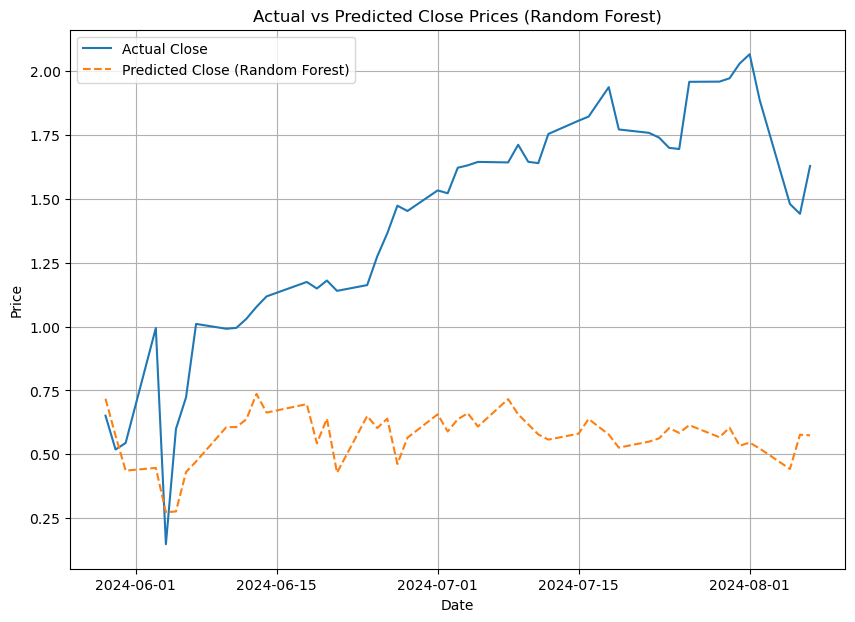

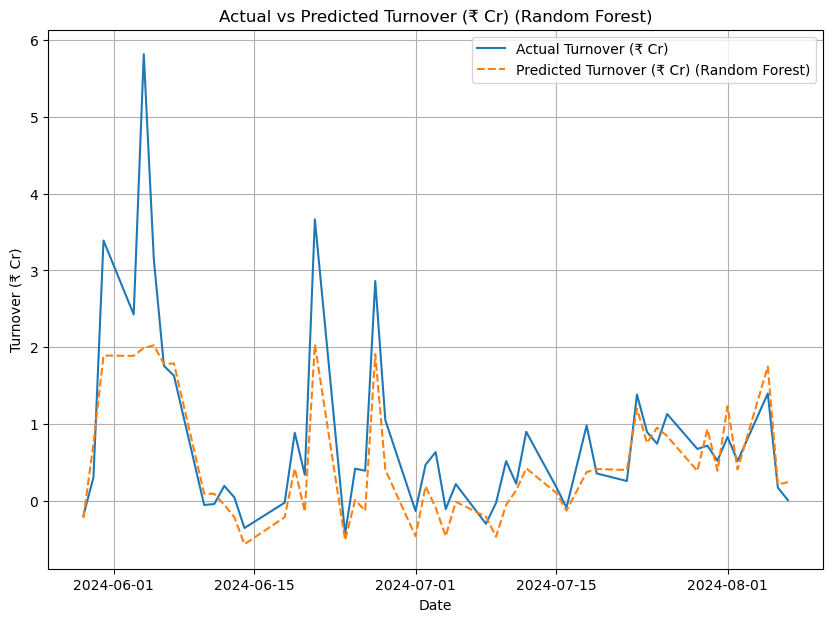

In [50]:
#visualizing the predictions from random forest regressor model 

# Plotting for target variable close 
plt.figure(figsize=(10, 7))
plt.plot(y_test.index, y_test['Close'], label='Actual Close')  # Plotting the actual values
plt.plot(y_test.index, y_pred_rf[:, 0], label='Predicted Close (Random Forest)', linestyle='--')  # Plotting the predicted values
plt.title('Actual vs Predicted Close Prices (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for target variable Turnover
plt.figure(figsize=(10, 7))
plt.plot(y_test.index, y_test['Turnover (₹ Cr)'], label='Actual Turnover (₹ Cr)')  # Plotting the actual values
plt.plot(y_test.index, y_pred_rf[:, 1], label='Predicted Turnover (₹ Cr) (Random Forest)', linestyle='--')  # Plotting the predicted values
plt.title('Actual vs Predicted Turnover (₹ Cr) (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Turnover (₹ Cr)')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#linear regression model 

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Separate the predictions into Close and Turnover
y_pred_close = y_pred_linear[:, 0]
y_pred_turnover = y_pred_linear[:, 1]

# Calculate the Mean Absolute Error for Close and Turnover
mae_close = mean_absolute_error(y_test['Close'], y_pred_close)
mae_turnover = mean_absolute_error(y_test['Turnover (₹ Cr)'], y_pred_turnover)

print(f'Mean Absolute Error for Close (Linear Regression): {mae_close}')
print(f'Mean Absolute Error for Turnover (₹ Cr) (Linear Regression): {mae_turnover}')

Mean Absolute Error for Close (Linear Regression): 0.011671573797582858
Mean Absolute Error for Turnover (₹ Cr) (Linear Regression): 0.5598038917341002


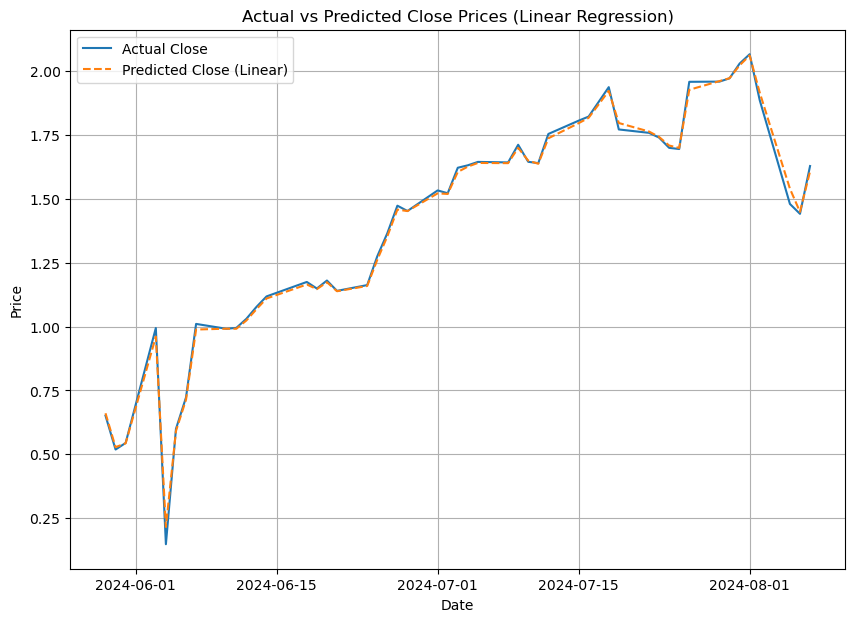

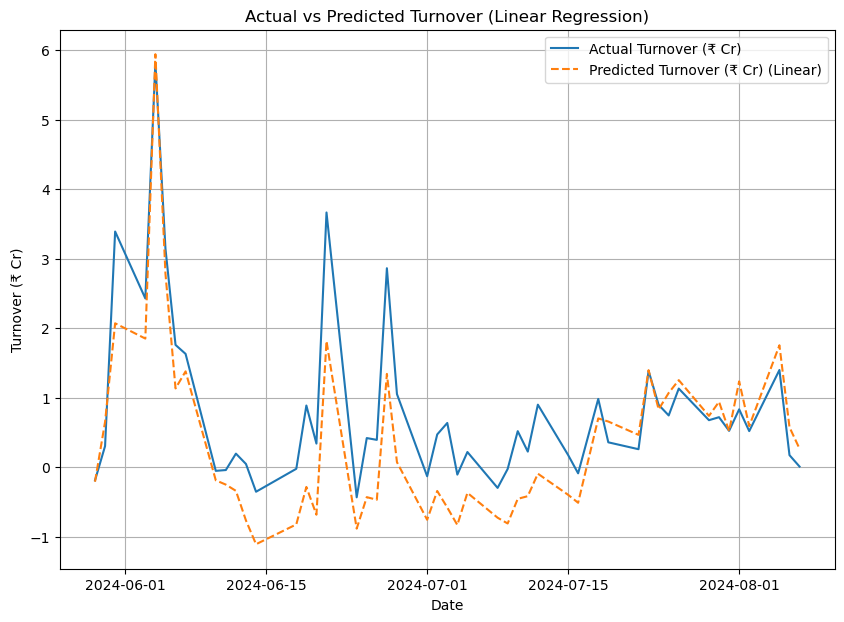

In [52]:
#visualizing the predictions from linear regression model 

# Plotting for target variable Close
plt.figure(figsize=(10, 7))
plt.plot(y_test.index, y_test['Close'], label='Actual Close')
plt.plot(y_test.index, y_pred_linear[:, 0], label='Predicted Close (Linear)', linestyle='--')
plt.title('Actual vs Predicted Close Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for target variable Turnover
plt.figure(figsize=(10, 7))
plt.plot(y_test.index, y_test['Turnover (₹ Cr)'], label='Actual Turnover (₹ Cr)')
plt.plot(y_test.index, y_pred_linear[:, 1], label='Predicted Turnover (₹ Cr) (Linear)', linestyle='--')
plt.title('Actual vs Predicted Turnover (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Turnover (₹ Cr)')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Support Vector Machine (SVM) model

# Initialize the SVR model
svr = SVR(kernel='rbf') 

# Wrapping it in MultiOutputRegressor to handle multiple outputs
svr_model = MultiOutputRegressor(svr)

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate performance
mae_close_svr = mean_absolute_error(y_test['Close'], y_pred_svr[:, 0])
mae_turnover_svr = mean_absolute_error(y_test['Turnover (₹ Cr)'], y_pred_svr[:, 1])

print(f'Mean Absolute Error for Close (SVR): {mae_close_svr}')
print(f'Mean Absolute Error for Turnover (₹ Cr) (SVR): {mae_turnover_svr}')

Mean Absolute Error for Close (SVR): 1.662836598328393
Mean Absolute Error for Turnover (₹ Cr) (SVR): 0.7998507305239958


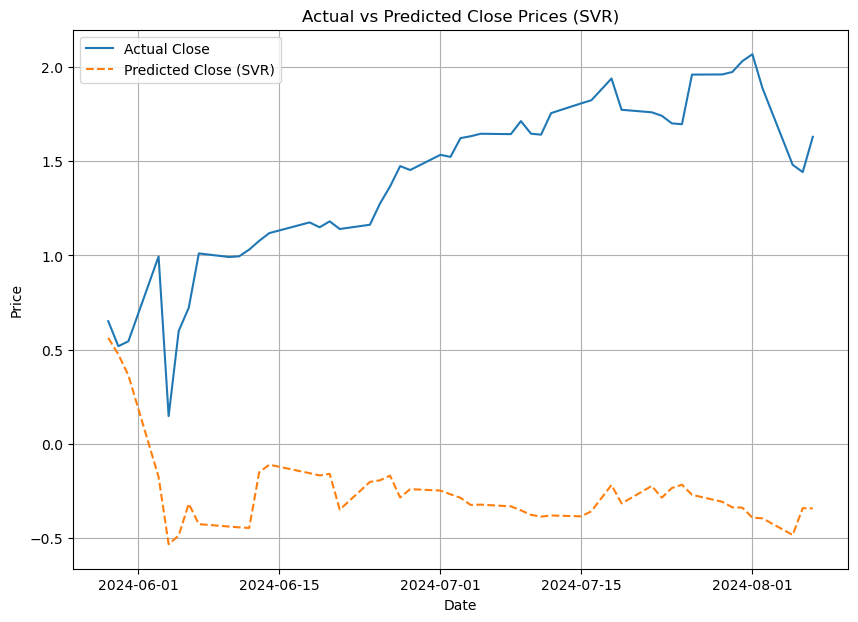

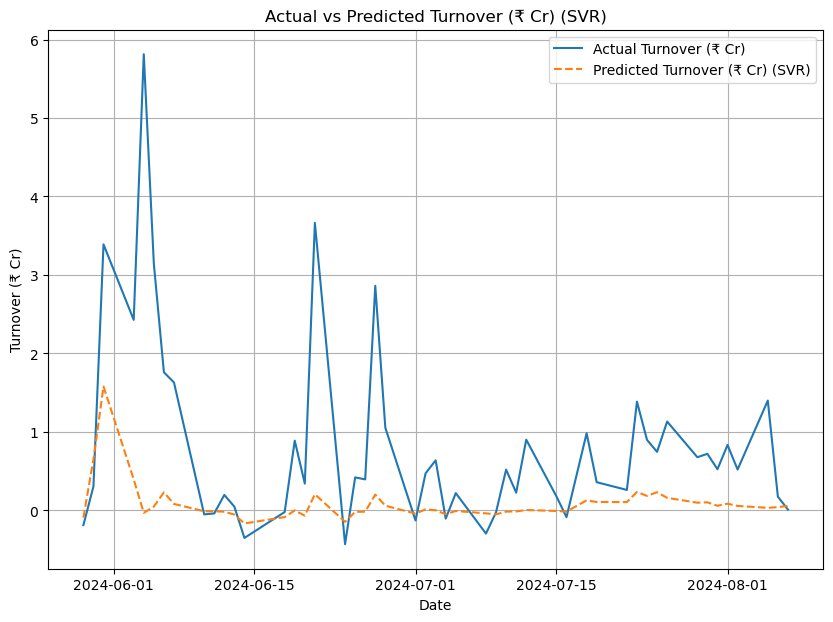

In [54]:
#visualizing the predictons for SVR or SVM model

# Plot for Close 
plt.figure(figsize=(10, 7))
plt.plot(y_test.index, y_test['Close'], label='Actual Close')
plt.plot(y_test.index, y_pred_svr[:, 0], label='Predicted Close (SVR)', linestyle='--')
plt.title('Actual vs Predicted Close Prices (SVR)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Turnover
plt.figure(figsize=(10, 7))
plt.plot(y_test.index, y_test['Turnover (₹ Cr)'], label='Actual Turnover (₹ Cr)')
plt.plot(y_test.index, y_pred_svr[:, 1], label='Predicted Turnover (₹ Cr) (SVR)', linestyle='--')
plt.title('Actual vs Predicted Turnover (₹ Cr) (SVR)')
plt.xlabel('Date')
plt.ylabel('Turnover (₹ Cr)')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
#Compute evaluation metrics for Linear Regression
mae_linear_close = mean_absolute_error(y_test['Close'], y_pred_linear[:, 0])
mse_linear_close = mean_squared_error(y_test['Close'], y_pred_linear[:, 0])
r2_linear_close = r2_score(y_test['Close'], y_pred_linear[:, 0])

mae_linear_turnover = mean_absolute_error(y_test['Turnover (₹ Cr)'], y_pred_linear[:, 1])
mse_linear_turnover = mean_squared_error(y_test['Turnover (₹ Cr)'], y_pred_linear[:, 1])
r2_linear_turnover = r2_score(y_test['Turnover (₹ Cr)'], y_pred_linear[:, 1])

# Compute evaluation metrics for Random Forest
mae_rf_close = mean_absolute_error(y_test['Close'], y_pred_rf[:, 0])
mse_rf_close = mean_squared_error(y_test['Close'], y_pred_rf[:, 0])
r2_rf_close = r2_score(y_test['Close'], y_pred_rf[:, 0])

mae_rf_turnover = mean_absolute_error(y_test['Turnover (₹ Cr)'], y_pred_rf[:, 1])
mse_rf_turnover = mean_squared_error(y_test['Turnover (₹ Cr)'], y_pred_rf[:, 1])
r2_rf_turnover = r2_score(y_test['Turnover (₹ Cr)'], y_pred_rf[:, 1])

# Compute evaluation metrics for SVM
mae_svm_close = mean_absolute_error(y_test['Close'], y_pred_svr[:, 0])
mse_svm_close = mean_squared_error(y_test['Close'], y_pred_svr[:, 0])
r2_svm_close = r2_score(y_test['Close'], y_pred_svr[:, 0])

mae_svm_turnover = mean_absolute_error(y_test['Turnover (₹ Cr)'], y_pred_svr[:, 1])
mse_svm_turnover = mean_squared_error(y_test['Turnover (₹ Cr)'], y_pred_svr[:, 1])
r2_svm_turnover = r2_score(y_test['Turnover (₹ Cr)'], y_pred_svr[:, 1])


 the heatmap shows the different evaluation metric value for each model 



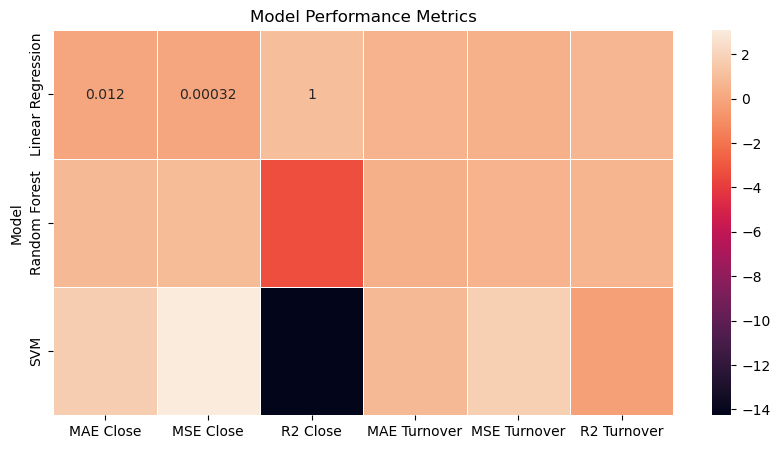

In [56]:
# Compiling evaluation metrics into a DataFrame for heatmap
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVM'],
    'MAE Close': [mae_linear_close, mae_rf_close, mae_svm_close],
    'MSE Close': [mse_linear_close, mse_rf_close, mse_svm_close],
    'R2 Close': [r2_linear_close, r2_rf_close, r2_svm_close],
    'MAE Turnover': [mae_linear_turnover, mae_rf_turnover, mae_svm_turnover],
    'MSE Turnover': [mse_linear_turnover, mse_rf_turnover, mse_svm_turnover],
    'R2 Turnover': [r2_linear_turnover, r2_rf_turnover, r2_svm_turnover]
})

# Set 'Model' column as index for the heatmap
metrics_df.set_index('Model', inplace=True)

print("\n the heatmap shows the different evaluation metric value for each model \n")

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(metrics_df, annot=True, linewidths=0.5)
plt.title('Model Performance Metrics')
plt.show()

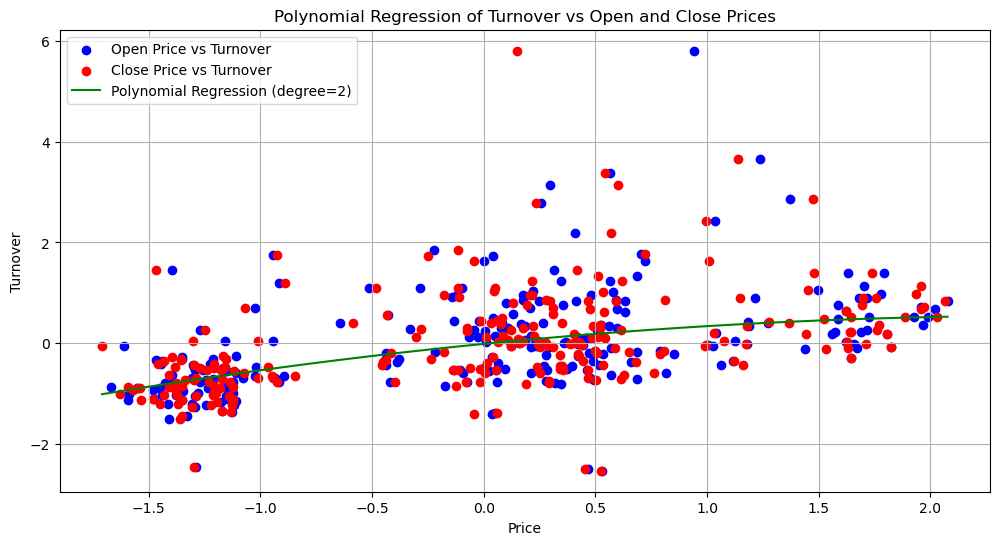

In [57]:
# plotting a polynomial feature for the features open, close and turnover 

# Prepare the features and target
X = df[['Open', 'Close']]
y = df['Turnover (₹ Cr)']

# Defining the degree of the polynomial
degree = 2

# Creating polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for plotting
X_range = np.linspace(X.min().min(), X.max().max(), 100)
X_plot = np.vstack([X_range, X_range]).T
X_plot_poly = poly.transform(X_plot)
y_pred = model.predict(X_plot_poly)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the original data points
plt.scatter(df['Open'], df['Turnover (₹ Cr)'], color='blue', label='Open Price vs Turnover')
plt.scatter(df['Close'], df['Turnover (₹ Cr)'], color='red', label='Close Price vs Turnover')

# Plot the polynomial regression curve
plt.plot(X_plot[:, 0], y_pred, color='green', label=f'Polynomial Regression (degree={degree})')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Turnover')
plt.title('Polynomial Regression of Turnover vs Open and Close Prices')
plt.legend()
plt.grid(True)

plt.show()